exercise: 1
title: Perceptron Learning Algorithm

Test Accuracy: 0.7650


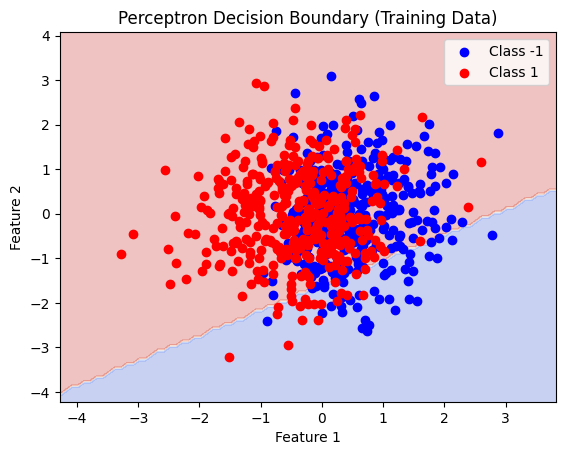

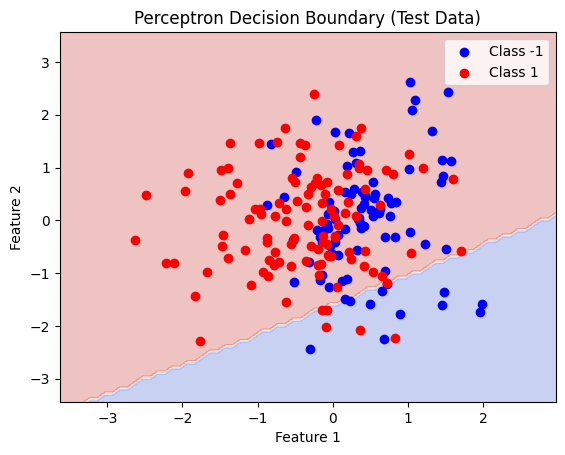

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

class Perceptron:
    def __init__(self, n_features):
        """Initialize weights and bias."""
        self.weights = np.zeros(n_features)
        self.bias = 0.0
    
    def predict(self, X):
        """Predict class labels using the sign function."""
        return np.sign(np.dot(X, self.weights) + self.bias)
    
    def train(self, X, y, epochs=100):
        """Train the perceptron using the perceptron learning rule."""
        for _ in range(epochs):
            for i in range(X.shape[0]):
                y_pred = self.predict(X[i])
                if y_pred != y[i]:
                    # Update weights and bias
                    self.weights += y[i] * X[i]
                    self.bias += y[i]

def plot_decision_boundary(X, y, perceptron, title):
    """Plot the decision boundary and data points."""
    # Define the range for the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict for each point in the mesh grid
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.ravel().shape[0], X.shape[1] - 2))])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], c='blue', label='Class -1')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

def main():
    """Main function to execute the perceptron training and visualization."""
    # Generate synthetic dataset
    X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
    y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1}
    
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the perceptron
    perceptron = Perceptron(n_features=X_train.shape[1])
    perceptron.train(X_train, y_train, epochs=100)
    
    # Compute test accuracy
    y_pred = perceptron.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Visualize decision boundary using the first two features
    plot_decision_boundary(X_train, y_train, perceptron, "Perceptron Decision Boundary (Training Data)")
    plot_decision_boundary(X_test, y_test, perceptron, "Perceptron Decision Boundary (Test Data)")

if __name__ == "__main__":
    main()

exercise: 1
title: Perceptron Learning Algorithm

Test accuracy: 0.7650


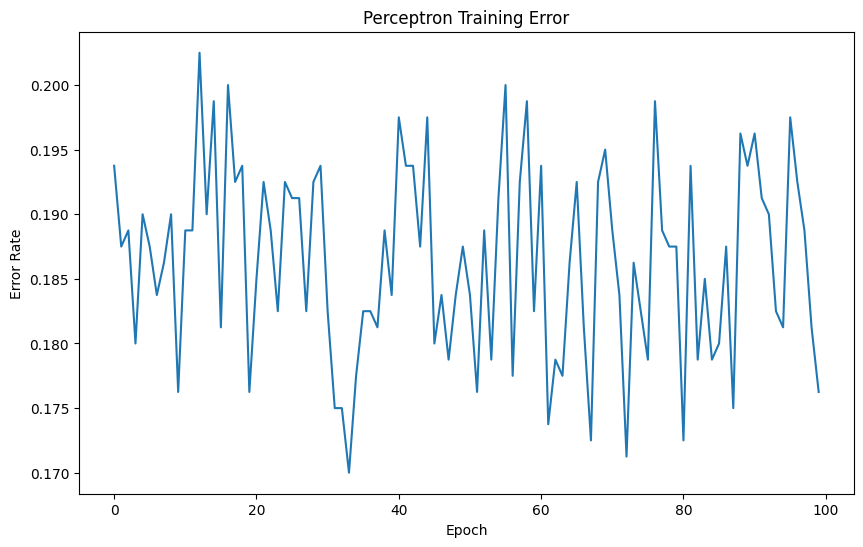

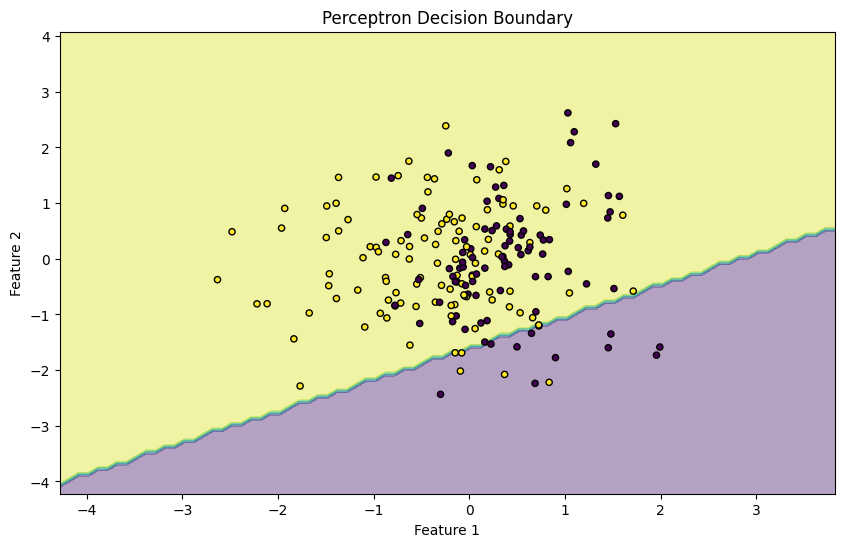

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
# Convert labels to {-1, 1}
y = 2 * y - 1

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement Perceptron class
class Perceptron:
    def __init__(self, n_features):
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
    def predict(self, X):
        # Compute the linear combination of inputs and weights
        linear_output = np.dot(X, self.weights) + self.bias
        # Apply sign function to get prediction (-1 or 1)
        return np.sign(linear_output)
    
    def train(self, X, y, epochs=100):
        n_samples = X.shape[0]
        errors = []
        
        for epoch in range(epochs):
            error_count = 0
            
            for i in range(n_samples):
                # Get current sample
                x_i = X[i]
                y_i = y[i]
                
                # Make prediction
                y_pred = self.predict(x_i)
                
                # Update weights and bias if prediction is wrong
                if y_i != y_pred:
                    self.weights += y_i * x_i
                    self.bias += y_i
                    error_count += 1
            
            # Store error rate for this epoch
            errors.append(error_count / n_samples)
            
        return errors
    
    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

# Train perceptron
perceptron = Perceptron(n_features=10)
errors = perceptron.train(X_train, y_train)

# Evaluate on test set
test_accuracy = perceptron.accuracy(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot errors over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors)
plt.xlabel('Epoch')
plt.ylabel('Error Rate')
plt.title('Perceptron Training Error')
plt.show()

# Visualize decision boundary (using first two features)
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Create a mesh using just the first two features
Z = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        x_point = np.zeros(10)  # 10 features
        x_point[0] = xx[i, j]
        x_point[1] = yy[i, j]
        Z[i, j] = perceptron.predict(x_point)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.show()

Exercise: 2 
Sigmoid Activation Function

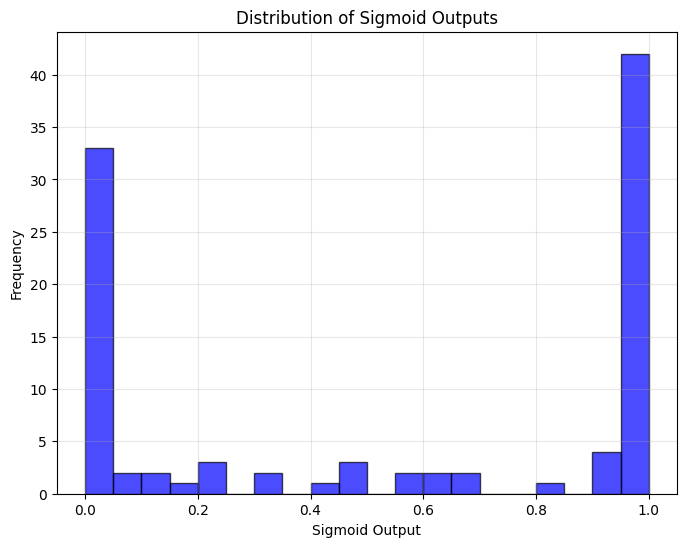

Sample sigmoid outputs (first 5): [9.82442519e-01 3.25784113e-06 9.98769763e-01 9.96482054e-01
 5.76186281e-01]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    """Compute sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def main():
    # Generate synthetic dataset: 100 samples, 50 features
    np.random.seed(42)  # For reproducibility
    X = np.random.randn(100, 50)
    
    # Initialize random weights and bias
    weights = np.random.randn(50)
    bias = np.random.randn()
    
    # Compute dot product: z = w^T X + b
    z = np.dot(X, weights) + bias
    
    # Apply sigmoid function
    y = sigmoid(z)
    
    # Visualize the output distribution
    plt.figure(figsize=(8, 6))
    plt.hist(y, bins=20, color='blue', alpha=0.7, edgecolor='black')
    plt.title('Distribution of Sigmoid Outputs')
    plt.xlabel('Sigmoid Output')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Print sample outputs for verification
    print(f"Sample sigmoid outputs (first 5): {y[:5]}")

if __name__ == "__main__":
    main()

Exercise: 2
Sigmoid Activation Function

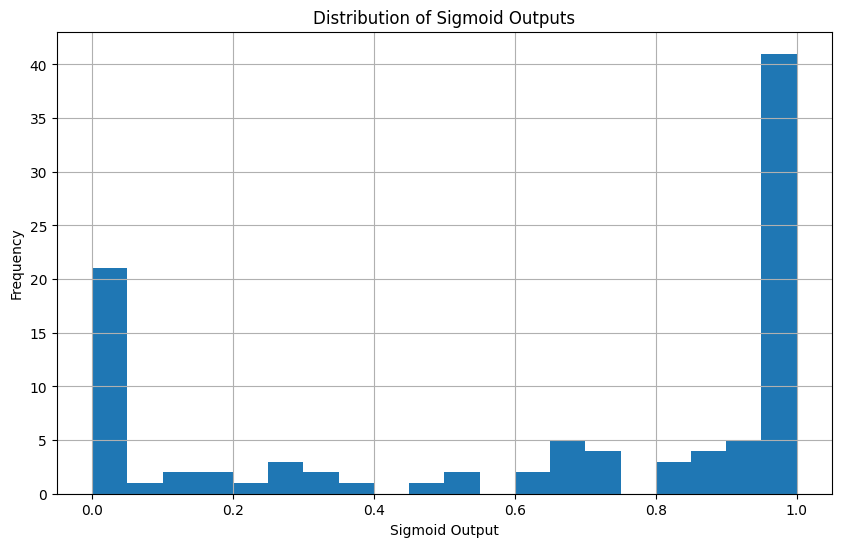

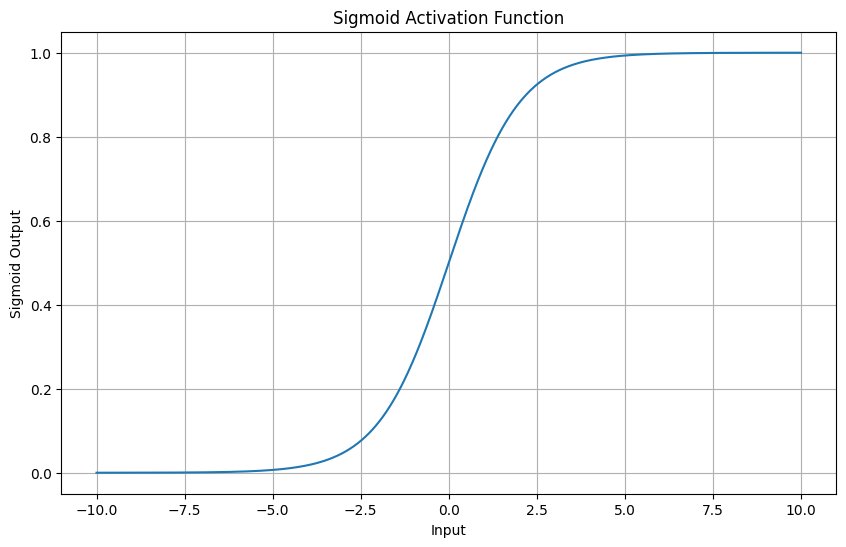

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random high-dimensional data
X = np.random.randn(100, 50)

# Implement sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate random weights and bias
w = np.random.randn(50)
b = np.random.randn()

# Compute dot product and apply sigmoid
z = np.dot(X, w) + b
a = sigmoid(z)

# Plot distribution of sigmoid outputs
plt.figure(figsize=(10, 6))
plt.hist(a, bins=20)
plt.xlabel('Sigmoid Output')
plt.ylabel('Frequency')
plt.title('Distribution of Sigmoid Outputs')
plt.grid(True)
plt.show()

# Visualize the sigmoid function itself
x_vals = np.linspace(-10, 10, 1000)
y_vals = sigmoid(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals)
plt.xlabel('Input')
plt.ylabel('Sigmoid Output')
plt.title('Sigmoid Activation Function')
plt.grid(True)
plt.show()

Exercise: 3
Forward Pass for Neural Network

Predicted outputs for 10 test samples:
Sample 1: [0.5012757  0.50242619]
Sample 2: [0.50136527 0.50252545]
Sample 3: [0.50128532 0.5022719 ]
Sample 4: [0.50125286 0.50236524]
Sample 5: [0.50127313 0.50228259]
Sample 6: [0.50128884 0.50226323]
Sample 7: [0.5012725  0.50233579]
Sample 8: [0.50139343 0.50241061]
Sample 9: [0.50128458 0.50233805]
Sample 10: [0.50128533 0.50231184]


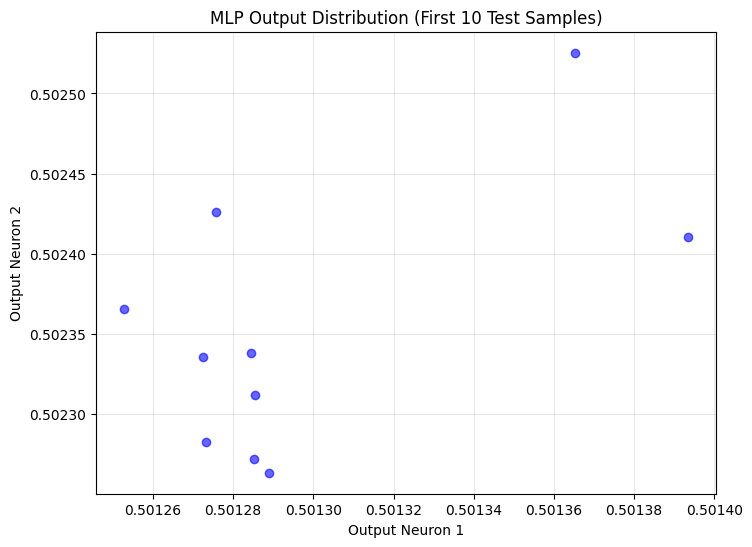

In [ ]:
#
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def sigmoid(z):
    """Compute sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        """Initialize weights and biases for MLP."""
        np.random.seed(42)  # For reproducibility
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
    
    def forward(self, X):
        """Compute forward pass through MLP."""
        # First layer: Z1 = W1 * X + b1, A1 = sigmoid(Z1)
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        # Second layer: Z2 = W2 * A1 + b2, A2 = sigmoid(Z2)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

def main():
    # Generate synthetic dataset: 500 samples, 20 features
    X, y = make_classification(n_samples=500, n_features=20, n_classes=2, random_state=42)
    
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize MLP: 20 input features, 8 hidden neurons, 2 output neurons
    mlp = MLP(input_size=20, hidden_size=8, output_size=2)
    
    # Compute forward pass for 10 test samples
    test_samples = X_test[:10]
    outputs = mlp.forward(test_samples)
    
    # Print predicted outputs
    print("Predicted outputs for 10 test samples:")
    for i in range(10):
        print(f"Sample {i+1}: {outputs[i]}")
    
    # Visualize output distribution
    plt.figure(figsize=(8, 6))
    plt.scatter(outputs[:, 0], outputs[:, 1], c='blue', alpha=0.6)
    plt.title('MLP Output Distribution (First 10 Test Samples)')
    plt.xlabel('Output Neuron 1')
    plt.ylabel('Output Neuron 2')
    plt.grid(True, alpha=0.3)
    plt.show()

if __name__ == "__main__":
    main()

Exercise: 3
Forward Pass for Neural Network

Output for first 10 samples:
[[0.50404414 0.49937484]
 [0.50408703 0.49950936]
 [0.5040819  0.49938257]
 [0.50404328 0.49937537]
 [0.5040174  0.49930888]
 [0.50400057 0.49946545]
 [0.50403776 0.49938441]
 [0.50397031 0.49938957]
 [0.50404161 0.49925939]
 [0.50399426 0.49931688]]


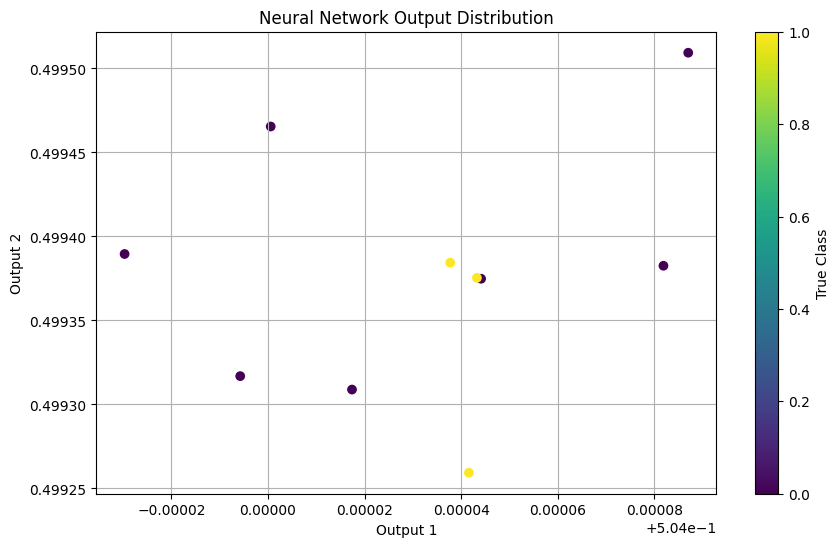

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=20, n_classes=2, random_state=42)

# Implement sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Implement forward pass for multi-layer perceptron
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros(output_size)
        
    def forward(self, X):
        # First layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        
        # Second layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        return self.A2

# Create MLP with 20 input features, 8 hidden neurons, and 2 output neurons
mlp = MLP(input_size=20, hidden_size=8, output_size=2)

# Select 10 test samples
X_test = X[:10]

# Compute forward pass
output = mlp.forward(X_test)
print("Output for first 10 samples:")
print(output)

# Visualize output distribution
plt.figure(figsize=(10, 6))
plt.scatter(output[:, 0], output[:, 1], c=y[:10])
plt.xlabel('Output 1')
plt.ylabel('Output 2')
plt.title('Neural Network Output Distribution')
plt.colorbar(label='True Class')
plt.grid(True)
plt.show()

Exercise 4: 
Gradient Descent for Linear Perceptron

Test Mean Squared Error: 36931286456672059306541223484210533732784874851888746245734488306260978059151764061163342772128679948376815844554961872825383649399847351845805722364896794190288552297885286901220240590150431731218460518524514295261012361256317873970332345720147882553353699328.0000


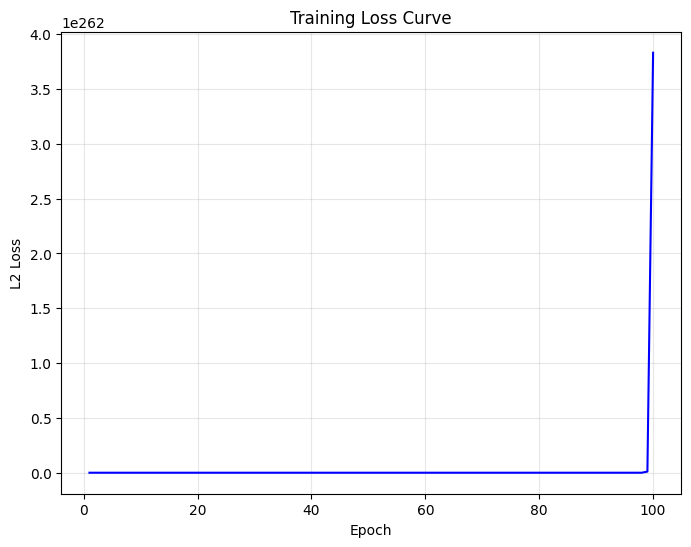

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

class LinearPerceptron:
    def __init__(self, n_features):
        """Initialize weights and bias."""
        np.random.seed(42)  # For reproducibility
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = 0.0
    
    def predict(self, X):
        """Compute prediction: y_hat = w^T x + b."""
        return np.dot(X, self.weights) + self.bias
    
    def compute_loss(self, X, y):
        """Compute L2 loss: sum(y - y_hat)^2."""
        y_hat = self.predict(X)
        return np.sum((y - y_hat) ** 2)
    
    def compute_gradients(self, X, y):
        """Compute gradients for weights and bias."""
        y_hat = self.predict(X)
        error = y - y_hat
        grad_w = -2 * np.dot(X.T, error)
        grad_b = -2 * np.sum(error)
        return grad_w, grad_b
    
    def train(self, X, y, epochs=100, learning_rate=0.01):
        """Train perceptron using gradient descent."""
        losses = []
        for epoch in range(epochs):
            # Compute gradients
            grad_w, grad_b = self.compute_gradients(X, y)
            # Update parameters
            self.weights -= learning_rate * grad_w
            self.bias -= learning_rate * grad_b
            # Compute and store loss
            loss = self.compute_loss(X, y)
            losses.append(loss)
        return losses

def main():
    # Generate synthetic regression dataset: 1000 samples, 15 features
    X, y = make_regression(n_samples=1000, n_features=15, noise=0.1, random_state=42)
    
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train perceptron
    perceptron = LinearPerceptron(n_features=X_train.shape[1])
    losses = perceptron.train(X_train, y_train, epochs=100, learning_rate=0.01)
    
    # Compute test MSE
    test_mse = perceptron.compute_loss(X_test, y_test) / X_test.shape[0]
    print(f"Test Mean Squared Error: {test_mse:.4f}")
    
    # Plot loss curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 101), losses, color='blue')
    plt.title('Training Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('L2 Loss')
    plt.grid(True, alpha=0.3)
    plt.show()

if __name__ == "__main__":
    main()

Exercise 4: 
Gradient Descent for Linear Perceptron

Test MSE: 824.0247


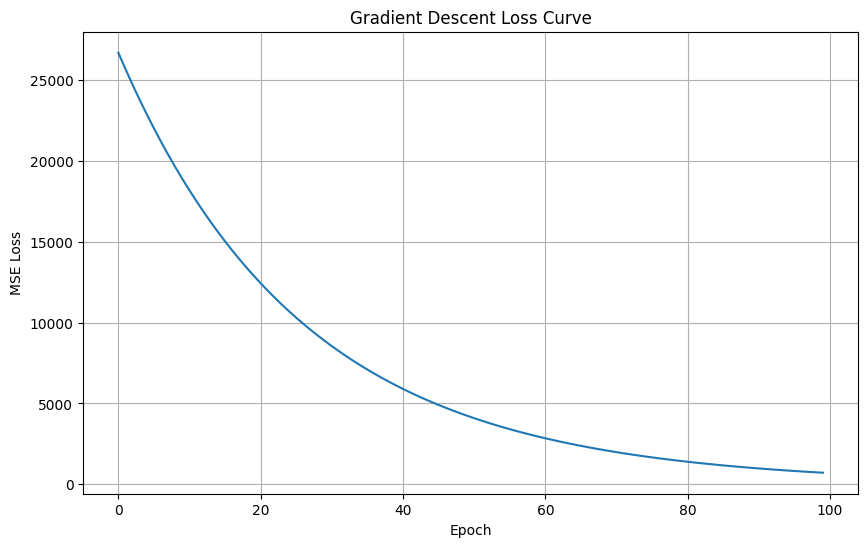

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=15, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement gradient descent for regression
class LinearRegression:
    def __init__(self, n_features, learning_rate=0.01):
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.lr = learning_rate
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def train(self, X, y, epochs=100):
        n_samples = X.shape[0]
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.predict(X)
            
            # Compute loss (MSE)
            loss = np.mean((y - y_pred) ** 2)
            losses.append(loss)
            
            # Compute gradients
            dw = -2 * np.dot(X.T, (y - y_pred)) / n_samples
            db = -2 * np.mean(y - y_pred)
            
            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
        return losses

# Train linear regression model
linear_model = LinearRegression(n_features=15, learning_rate=0.01)
losses = linear_model.train(X_train, y_train, epochs=100)

# Evaluate on test set
test_predictions = linear_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print(f"Test MSE: {test_mse:.4f}")

# Plot loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses)), losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Gradient Descent Loss Curve')
plt.grid(True)
plt.show()

Exercise 5: 
Backpropagation for Binary Classification

Test Accuracy: 0.4625


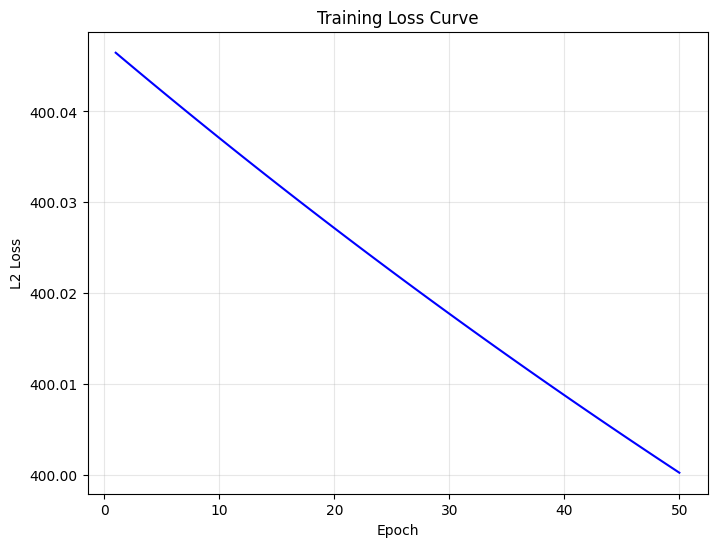

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def sigmoid(z):
    """Compute sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    """Compute derivative of sigmoid function."""
    s = sigmoid(z)
    return s * (1 - s)

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        """Initialize weights and biases for MLP."""
        np.random.seed(42)  # For reproducibility
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
    
    def forward(self, X):
        """Compute forward pass through MLP."""
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2
    
    def compute_loss(self, y, y_hat):
        """Compute L2 loss: sum(y - y_hat)^2."""
        return np.sum((y - y_hat) ** 2)
    
    def backward(self, X, y, y_hat, learning_rate=0.01):
        """Compute gradients and update weights using backpropagation."""
        m = X.shape[0]
        
        # Output layer gradients
        dL_dA2 = -2 * (y - y_hat)
        dA2_dZ2 = sigmoid_derivative(self.Z2)
        dL_dZ2 = dL_dA2 * dA2_dZ2
        
        dL_dW2 = np.dot(self.A1.T, dL_dZ2) / m
        dL_db2 = np.sum(dL_dZ2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients
        dL_dA1 = np.dot(dL_dZ2, self.W2.T)
        dA1_dZ1 = sigmoid_derivative(self.Z1)
        dL_dZ1 = dL_dA1 * dA1_dZ1
        
        dL_dW1 = np.dot(X.T, dL_dZ1) / m
        dL_db1 = np.sum(dL_dZ1, axis=0, keepdims=True) / m
        
        # Update weights and biases
        self.W2 -= learning_rate * dL_dW2
        self.b2 -= learning_rate * dL_db2
        self.W1 -= learning_rate * dL_dW1
        self.b1 -= learning_rate * dL_db1
    
    def train(self, X, y, epochs=50, learning_rate=0.01):
        """Train MLP using backpropagation."""
        losses = []
        for epoch in range(epochs):
            # Forward pass
            y_hat = self.forward(X)
            # Compute loss
            loss = self.compute_loss(y, y_hat)
            losses.append(loss)
            # Backward pass
            self.backward(X, y, y_hat, learning_rate)
        return losses
    
    def predict(self, X):
        """Predict binary labels (0 or 1)."""
        y_hat = self.forward(X)
        return (y_hat > 0.5).astype(int)

def main():
    # Generate synthetic dataset: 2000 samples, 10 features
    X, y = make_classification(n_samples=2000, n_features=10, n_classes=2, random_state=42)
    y = y.reshape(-1, 1)  # Reshape for MLP output
    
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize MLP: 10 input features, 6 hidden neurons, 1 output neuron
    mlp = MLP(input_size=10, hidden_size=6, output_size=1)
    
    # Train MLP
    losses = mlp.train(X_train, y_train, epochs=50, learning_rate=0.01)
    
    # Compute test accuracy
    y_pred = mlp.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Plot loss curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 51), losses, color='blue')
    plt.title('Training Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('L2 Loss')
    plt.grid(True, alpha=0.3)
    plt.show()

if __name__ == "__main__":
    main()

Exercise 5: 
Backpropagation for Binary Classification

Epoch 0, Loss: 0.6932
Epoch 5, Loss: 0.6931
Epoch 10, Loss: 0.6930
Epoch 15, Loss: 0.6929
Epoch 20, Loss: 0.6929
Epoch 25, Loss: 0.6928
Epoch 30, Loss: 0.6928
Epoch 35, Loss: 0.6927
Epoch 40, Loss: 0.6927
Epoch 45, Loss: 0.6926
Test accuracy: 0.4625


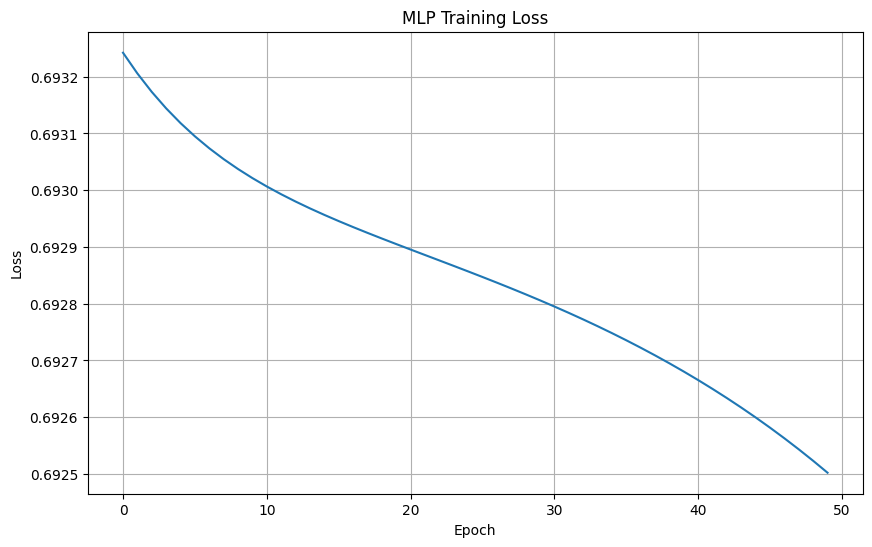

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=2000, n_features=10, n_classes=2, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to avoid overflow

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Implement MLP with backpropagation
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.lr = learning_rate
        
    def forward(self, X):
        # First layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        
        # Second layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        return self.A2
    
    def compute_loss(self, y_true, y_pred):
        # Binary cross-entropy loss
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15)) / m
        return loss
    
    def backward(self, X, y):
        m = X.shape[0]
        
        # Convert y to column vector
        y = y.reshape(-1, 1)
        
        # Output layer gradients
        dZ2 = self.A2 - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients
        dZ1 = np.dot(dZ2, self.W2.T) * sigmoid_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        # Update parameters
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
    
    def train(self, X, y, epochs=50):
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Compute loss
            loss = self.compute_loss(y.reshape(-1, 1), y_pred)
            losses.append(loss)
            
            # Backward pass
            self.backward(X, y)
            
            if epoch % 5 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        return losses
    
    def predict(self, X):
        # Make predictions
        y_pred = self.forward(X)
        # Convert to 0/1 predictions
        return (y_pred > 0.5).astype(int)

# Train MLP
mlp = MLP(input_size=10, hidden_size=6, output_size=1, learning_rate=0.1)
losses = mlp.train(X_train, y_train, epochs=50)

# Evaluate on test set
y_pred = mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses)), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP Training Loss')
plt.grid(True)
plt.show()

Exercise 6: 
Stochastic Gradient Descent with Minibatches


Training with batch size: 1
Epoch 0, Loss: 0.6895
Epoch 5, Loss: 0.2597
Epoch 10, Loss: 0.2557
Epoch 15, Loss: 0.2428
Epoch 20, Loss: 0.2326
Epoch 25, Loss: 0.2287
Epoch 30, Loss: 0.2264
Epoch 35, Loss: 0.2234
Epoch 40, Loss: 0.2241
Epoch 45, Loss: 0.2232
Test accuracy with batch size 1: 0.8950

Training with batch size: 16
Epoch 0, Loss: 0.6933
Epoch 5, Loss: 0.6927
Epoch 10, Loss: 0.6897
Epoch 15, Loss: 0.6706
Epoch 20, Loss: 0.6001
Epoch 25, Loss: 0.4898
Epoch 30, Loss: 0.4005
Epoch 35, Loss: 0.3447
Epoch 40, Loss: 0.3116
Epoch 45, Loss: 0.2918
Test accuracy with batch size 16: 0.8950

Training with batch size: 64
Epoch 0, Loss: 0.6932
Epoch 5, Loss: 0.6931
Epoch 10, Loss: 0.6930
Epoch 15, Loss: 0.6929
Epoch 20, Loss: 0.6928
Epoch 25, Loss: 0.6925
Epoch 30, Loss: 0.6921
Epoch 35, Loss: 0.6915
Epoch 40, Loss: 0.6905
Epoch 45, Loss: 0.6890
Test accuracy with batch size 64: 0.4650


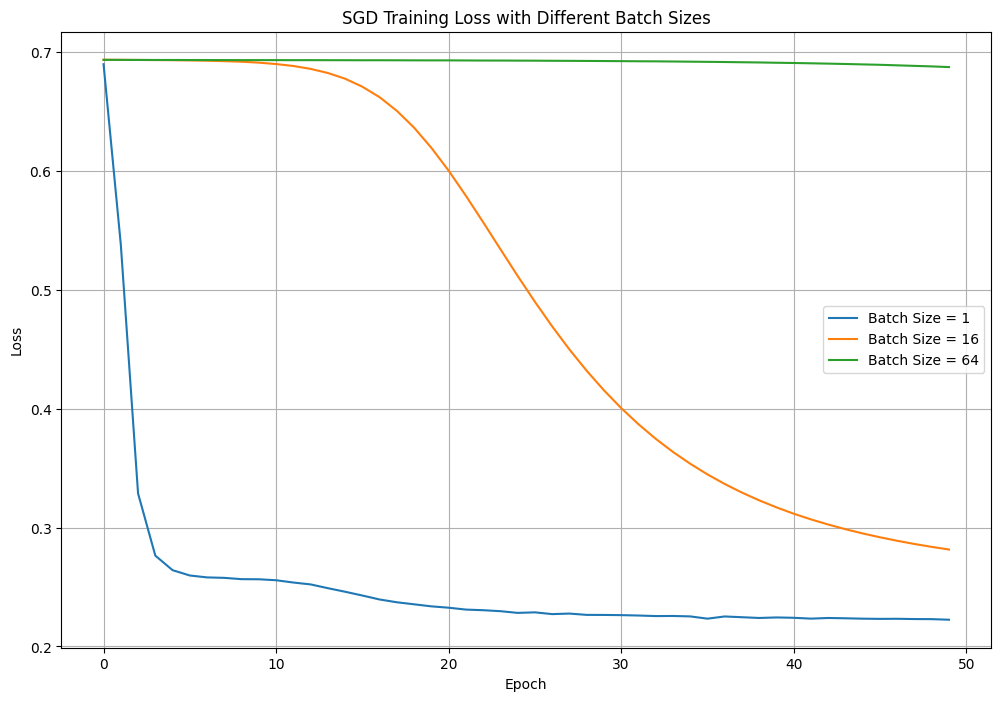

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=2000, n_features=10, n_classes=2, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Implement MLP with SGD
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.lr = learning_rate
        
    def forward(self, X):
        # First layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        
        # Second layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        return self.A2
    
    def compute_loss(self, y_true, y_pred):
        # Binary cross-entropy loss
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15)) / m
        return loss
    
    def backward(self, X, y):
        m = X.shape[0]
        
        # Convert y to column vector
        y = y.reshape(-1, 1)
        
        # Output layer gradients
        dZ2 = self.A2 - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients
        dZ1 = np.dot(dZ2, self.W2.T) * sigmoid_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        # Update parameters
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
    
    def train_sgd(self, X, y, epochs=50, batch_size=32):
        losses = []
        n_samples = X.shape[0]
        
        for epoch in range(epochs):
            epoch_loss = 0
            
            # Random shuffle
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            # Mini-batch training
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                
                # Forward pass
                y_pred = self.forward(X_batch)
                
                # Compute loss
                loss = self.compute_loss(y_batch.reshape(-1, 1), y_pred)
                epoch_loss += loss * len(X_batch) / n_samples
                
                # Backward pass
                self.backward(X_batch, y_batch)
            
            losses.append(epoch_loss)
            
            if epoch % 5 == 0:
                print(f"Epoch {epoch}, Loss: {epoch_loss:.4f}")
        
        return losses
    
    def predict(self, X):
        # Make predictions
        y_pred = self.forward(X)
        # Convert to 0/1 predictions
        return (y_pred > 0.5).astype(int)

# Train with different batch sizes
batch_sizes = [1, 16, 64]
all_losses = []

plt.figure(figsize=(12, 8))

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")
    mlp = MLP(input_size=10, hidden_size=6, output_size=1, learning_rate=0.01)
    losses = mlp.train_sgd(X_train, y_train, epochs=50, batch_size=batch_size)
    all_losses.append(losses)
    
    # Evaluate
    y_pred = mlp.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy with batch size {batch_size}: {test_accuracy:.4f}")
    
    # Plot loss curve
    plt.plot(range(len(losses)), losses, label=f'Batch Size = {batch_size}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SGD Training Loss with Different Batch Sizes')
plt.legend()
plt.grid(True)
plt.show()

Exercise 6: 
Stochastic Gradient Descent with Minibatches

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def sigmoid(z):
    """Compute sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    """Compute derivative of sigmoid function."""
    s = sigmoid(z)
    return s * (1 - s)

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        """Initialize weights and biases for MLP."""
        np.random.seed(42)  # For reproducibility
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
    
    def forward(self, X):
        """Compute forward pass through MLP."""
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2
    
    def compute_loss(self, y, y_hat):
        """Compute L2 loss: sum(y - y_hat)^2."""
        return np.sum((y - y_hat) ** 2)
    
    def backward(self, X, y, y_hat, learning_rate=0.01):
        """Compute gradients and update weights using backpropagation."""
        m = X.shape[0]
        
        # Output layer gradients
        dL_dA2 = -2 * (y - y_hat)
        dA2_dZ2 = sigmoid_derivative(self.Z2)
        dL_dZ2 = dL_dA2 * dA2_dZ2
        
        dL_dW2 = np.dot(self.A1.T, dL_dZ2) / m
        dL_db2 = np.sum(dL_dZ2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients
        dL_dA1 = np.dot(dL_dZ2, self.W2.T)
        dA1_dZ1 = sigmoid_derivative(self.Z1)
        dL_dZ1 = dL_dA1 * dA1_dZ1
        
        dL_dW1 = np.dot(X.T, dL_dZ1) / m
        dL_db1 = np.sum(dL_dZ1, axis=0, keepdims=True) / m
        
        # Update weights and biases
        self.W2 -= learning_rate * dL_dW2
        self.b2 -= learning_rate * dL_db2
        self.W1 -= learning_rate * dL_dW1
        self.b1 -= learning_rate * dL_db1
    
    def train_sgd(self, X, y, epochs=50, batch_size=16, learning_rate=0.01):
        """Train MLP using SGD with minibatches."""
        losses = []
        n_samples = X.shape[0]
        
        for epoch in range(epochs):
            # Shuffle indices for random minibatch sampling
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            # Process minibatches
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                
                # Forward pass
                y_hat = self.forward(X_batch)
                # Backward pass
                self.backward(X_batch, y_batch, y_hat, learning_rate)
            
            # Compute loss for entire training set
            y_hat_full = self.forward(X)
            loss = self.compute_loss(y, y_hat_full)
            losses.append(loss)
        
        return losses
    
    def predict(self, X):
        """Predict binary labels (0 or 1)."""
        y_hat = self.forward(X)
        return (y_hat > 0.5).astype(int)

def main():
    # Generate synthetic dataset: 2000 samples, 10 features
    X, y = make_classification(n_samples=2000, n_features=10, n_classes=2, random_state=42)
    y = y.reshape(-1, 1)  # Reshape for MLP output
    
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define minibatch sizes to test
    batch_sizes = [1, 16, 64]
    losses_all = {}
    accuracies = {}
    
    # Train MLP for each minibatch size
    for batch_size in batch_sizes:
        print(f"\nTraining with batch size: {batch_size}")
        mlp = MLP(input_size=10, hidden_size=6, output_size=1)
        losses = mlp.train_sgd(X_train, y_train, epochs=50, batch_size=batch_size, learning_rate=0.01)
        losses_all[batch_size] = losses
        
        # Compute test accuracy
        y_pred = mlp.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        accuracies[batch_size] = accuracy
        print(f"Test Accuracy (batch size {batch_size}): {accuracy:.4f}")
    
    # Plot loss curves
    plt.figure(figsize=(10, 6))
    for batch_size in batch_sizes:
        plt.plot(range(1, 51), losses_all[batch_size], label=f'Batch Size {batch_size}')
    plt.title('Training Loss Curves for Different Minibatch Sizes')
    plt.xlabel('Epoch')
    plt.ylabel('L2 Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

if __name__ == "__main__":
    main()


Training with batch size: 1
